# Anti Money Laundering


#### 1. Business Problem

The purpose of this Anti-money laundering (AML) is to process of preventing and detecting the use of illicit funds for illegal activities. AML is a crucial challenge for financial institutions, as they face the risk of regulatory fines, reputational damage, and criminal prosecution if they fail to comply with the laws and regulations that aim to combat money laundering. AML also helps to protect the integrity and stability of the financial system, and to prevent the financing of terrorism, corruption, and other crimes.

#### 1.1. Business Objective

Maximize 

1. Compliance with legal and regulatory requirement
                   
Mininize
                    
1. The cost of compliance
                   
2. The risk of financial Crime
                   
3. The impact on Customer Experiance
                   
4. The financial losses
                   
5. Reputational risk

#### 1.2. Business Constraints

Maximize
    
1. The effectiveness of AML measures
        
2. The Allocation of resourse
            
Minimizes

1. the impact on customer experience
                    
2. the risk of financial exclusion

3. the impact on profitability

#### 2. Success Criteria

1. Business success criteria: A successful AML program ensures that the business is fully compliant with all relevant regulations, laws, and guidelines related to AML.
2. ML success criteria: Achiceve An Accuracy Of Atleast 90%
3. Economic success criteria: An effective AML program can help businesses identify and manage financial crime risks more effectively, reducing the likelihood of financial losses and other negative impacts.
4. Build a machine learning model to classify fraud and non-fraud transactions
5. Reduce the false negatives by tuning the model


#### 3. Data Collection

Synthetic dataset is generated with 100000 rows and 11 columns

Metadata Description

1. Step: Maps of unit time in real world.  (Ex: 1,2,3,........94)
2. Type: CASH-IN, CASH-OUT, DEBIT, PAY-MENT and TRANSFER.( Payment Method)
3. Amount: Amount of transaction in local currency. (Ex: 1047597,748463,....)
4. nameOrig: Customer number which starts transaction.( Ex: M000024121,...)
5. oldbalanceOrg: Initial balance before the transaction.(Ex: 9340000, 6130000,....)
6. newbalanceOrig: Customer's balance after the transaction.(Ex: 9340000, 6130000,....)
7. nameDest: Recipient of transaction's number.(Ex: M000027322)
8. oldbalanceDest: Initial recipient balance before the transaction.(Ex: 0)
9. newbalanceDest: Recipient's balance after the transaction.(Ex: 0)
10. isFraud: Fraud or not.(Ex: 1 or 0)
11. isFlaggedFraud: Money laundering or not according our heuristics.(Ex: 1 or 0)

#### 4. Data Preprocessing 
Cleaning Data and EDA/ Description Analytics

#### 5. Model Building
Hyperparameters tuning and Imbalanced dataset

#### Importing The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

Read the dataset

In [2]:
AML_Data= pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\360DigiTMG\Project\Money_Laundering_Dataset.csv")
AML_Data

Unnamed: 0  step      type     amount     nameOrig  oldbalanceOrg  \
0             0.0   1.0   PAYMENT    9839.64  C1231006815       170136.0   
1             1.0   1.0   PAYMENT    1864.28  C1666544295        21249.0   
2             2.0   1.0  TRANSFER     181.00  C1305486145          181.0   
3             3.0   1.0  CASH_OUT     181.00   C840083671          181.0   
4             4.0   1.0   PAYMENT   11668.14  C2048537720        41554.0   
...           ...   ...       ...        ...          ...            ...   
99995     99995.0  10.0   PAYMENT    4020.66  C1410794718            NaN   
99996     99996.0  10.0   PAYMENT   18345.49   C744303677            NaN   
99997     99997.0  10.0   CASH_IN  183774.91   C104331851            NaN   
99998     99998.0  10.0  CASH_OUT   82237.17   C707662966            NaN   
99999     99999.0  10.0   PAYMENT   20096.56  C1868032458            NaN   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0           160296.36  M1979787155            0.00            0.00      0.0   
1            19384.72  M2044282225            0.00            0.00      0.0   
2                0.00   C553264065            0.00            0.00      1.0   
3                0.00    C38997010        21182.00            0.00      1.0   
4            29885.86  M1230701703            0.00            0.00      0.0   
...               ...          ...             ...             ...      ...   
99995       155908.34  M1257036576            0.00            0.00      NaN   
99996            0.00  M1785344556            0.00            0.00      NaN   
99997       222947.91    C36392889        54925.05            0.00      NaN   
99998            0.00  C1553004158       592635.66       799140.46      NaN   
99999        90020.44  M1419201886            0.00            0.00      NaN   

       isFlaggedFraud  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
99995             0.0  
99996             0.0  
99997             0.0  
99998             0.0  
99999             0.0  

[100000 rows x 12 columns]

In [3]:
data_backup = AML_Data.copy()

In [4]:
#Dataset Information
AML_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [5]:
# Check The Null Values
AML_Data.isna().sum()

Unnamed: 0          3
step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [6]:
#Distribution of lefit transactions & Fraudulent transactions 
AML_Data['isFraud'].value_counts()

0.0    99268
1.0      415
Name: isFraud, dtype: int64

In [7]:
#Data Described
AML_Data.describe()

Unnamed: 0          step        amount  oldbalanceOrg  \
count  99997.000000  99323.000000  1.000000e+05   9.985700e+04   
mean   50000.972579      8.496229  1.736022e+05   8.789148e+05   
std    28866.838833      1.831287  3.443003e+05   2.674992e+06   
min        0.000000      1.000000  3.200000e-01   0.000000e+00   
25%    25002.000000      8.000000  9.963562e+03   0.000000e+00   
50%    50001.000000      9.000000  5.274552e+04   2.010000e+04   
75%    75000.000000     10.000000  2.117631e+05   1.908585e+05   
max    99999.000000     10.000000  1.000000e+07   3.379739e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  \
count    9.997800e+04    9.994800e+04    1.000000e+05  99683.000000   
mean     8.942587e+05    8.805609e+05    1.184041e+06      0.004163   
std      2.711584e+06    2.402526e+06    2.802350e+06      0.064389   
min      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
25%      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
50%      0.000000e+00    2.082250e+04    4.990918e+04      0.000000   
75%      2.149436e+05    5.881914e+05    1.058186e+06      0.000000   
max      3.400874e+07    3.400874e+07    3.894623e+07      1.000000   

       isFlaggedFraud  
count    99929.000000  
mean         0.000010  
std          0.003163  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [8]:
#To chech the shape of the dataset
print("Shape of the Dataset:", AML_Data.shape)

Shape of the Dataset: (100000, 12)


###  Exploratory Data Analysis

### ***1.1 Measures of Central Tendency*** 

1. Mean
2. median
3. Mode

In [9]:
#Mean
print("  mean  ".center(50,"#"))
print("\n")
print(AML_Data.mean())

#####################  mean  #####################


Unnamed: 0        5.000097e+04
step              8.496229e+00
amount            1.736022e+05
oldbalanceOrg     8.789148e+05
newbalanceOrig    8.942587e+05
oldbalanceDest    8.805609e+05
newbalanceDest    1.184041e+06
isFraud           4.163197e-03
isFlaggedFraud    1.000711e-05
dtype: float64


In [10]:
#Median
print("  median  ".center(50,"#"))
print("\n")
print(AML_Data.median())

####################  median  ####################


Unnamed: 0        50001.00
step                  9.00
amount            52745.52
oldbalanceOrg     20100.00
newbalanceOrig        0.00
oldbalanceDest    20822.50
newbalanceDest    49909.18
isFraud               0.00
isFlaggedFraud        0.00
dtype: float64


In [11]:
#Mode
print("  mode  ".center(50,"#"))
print("\n")
print(AML_Data.mode())

#####################  mode  #####################


       Unnamed: 0  step     type    amount     nameOrig  oldbalanceOrg  \
0             0.0   9.0  PAYMENT   2475.13  C1000037689            0.0   
1             1.0   NaN      NaN   6285.19  C1000039823            NaN   
2             2.0   NaN      NaN  17320.91  C1000079132            NaN   
3             3.0   NaN      NaN  25975.86  C1000109302            NaN   
4             4.0   NaN      NaN  29707.86  C1000119377            NaN   
...           ...   ...      ...       ...          ...            ...   
99992     99995.0   NaN      NaN       NaN          NaN            NaN   
99993     99996.0   NaN      NaN       NaN          NaN            NaN   
99994     99997.0   NaN      NaN       NaN          NaN            NaN   
99995     99998.0   NaN      NaN       NaN          NaN            NaN   
99996     99999.0   NaN      NaN       NaN          NaN            NaN   

       newbalanceOrig    nameDest  oldbalanceDest  newbala

### 2nd Moment Business Decision (Measures of Dispersion)
1. Variance
2. Standard deviation
3. Range (maximum - minimum)

In [12]:
#Variance
print("  Variance  ".center(50,"#"))
print("\n")
print(AML_Data.var())

###################  Variance  ###################


Unnamed: 0        8.332944e+08
step              3.353611e+00
amount            1.185427e+11
oldbalanceOrg     7.155582e+12
newbalanceOrig    7.352686e+12
oldbalanceDest    5.772132e+12
newbalanceDest    7.853164e+12
isFraud           4.145907e-03
isFlaggedFraud    1.000711e-05
dtype: float64


For Standard derivation and Range we can simple use Describe

In [13]:
AML_Data.describe()

Unnamed: 0          step        amount  oldbalanceOrg  \
count  99997.000000  99323.000000  1.000000e+05   9.985700e+04   
mean   50000.972579      8.496229  1.736022e+05   8.789148e+05   
std    28866.838833      1.831287  3.443003e+05   2.674992e+06   
min        0.000000      1.000000  3.200000e-01   0.000000e+00   
25%    25002.000000      8.000000  9.963562e+03   0.000000e+00   
50%    50001.000000      9.000000  5.274552e+04   2.010000e+04   
75%    75000.000000     10.000000  2.117631e+05   1.908585e+05   
max    99999.000000     10.000000  1.000000e+07   3.379739e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  \
count    9.997800e+04    9.994800e+04    1.000000e+05  99683.000000   
mean     8.942587e+05    8.805609e+05    1.184041e+06      0.004163   
std      2.711584e+06    2.402526e+06    2.802350e+06      0.064389   
min      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
25%      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
50%      0.000000e+00    2.082250e+04    4.990918e+04      0.000000   
75%      2.149436e+05    5.881914e+05    1.058186e+06      0.000000   
max      3.400874e+07    3.400874e+07    3.894623e+07      1.000000   

       isFlaggedFraud  
count    99929.000000  
mean         0.000010  
std          0.003163  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

### ***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [14]:
#Skewnss
print("  Skewness  ".center(50,"#"))
print("\n")
AML_Data.skew()

###################  Skewness  ###################




Unnamed: 0         -0.000006
step               -2.531217
amount              5.428317
oldbalanceOrg       4.954230
newbalanceOrig      4.888920
oldbalanceDest      5.056895
newbalanceDest      4.319535
isFraud            15.401666
isFlaggedFraud    316.115485
dtype: float64

### ***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [15]:
#Kurtosis
print("  mean  ".center(50,"#"))
print("\n")
AML_Data.kurt()

#####################  mean  #####################




Unnamed: 0           -1.199993
step                  7.235359
amount               48.099033
oldbalanceOrg        31.531541
newbalanceOrig       30.701960
oldbalanceDest       32.475697
newbalanceDest       23.915283
isFraud             235.216039
isFlaggedFraud    99929.000000
dtype: float64

### Data Visualization

In [16]:
AML_Data['type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [17]:
type = AML_Data['type'].value_counts()
transaction = type.index
quantity = type.values

In [18]:
import plotly.express as px
px.pie(AML_Data,values=quantity,names=transaction,hole=0.4,title="Distribution of Transaction type")

([<matplotlib.patches.Wedge at 0x1c98650ab80>,
 [Text(-1.099905916824577, 0.014386595646186707, ''),
  Text(1.0999059164457412, -0.01438662460948792, '')],
 [Text(-0.5999486819043146, 0.007847233988829111, '99.58%'),
  Text(0.5999486816976769, -0.00784724978699341, '0.42%')])

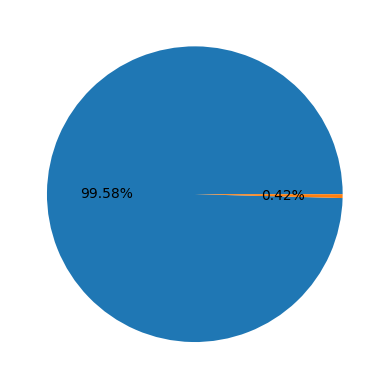

In [19]:
plt.pie(AML_Data['isFraud'].value_counts(),  autopct='%.2f%%')

<AxesSubplot: >

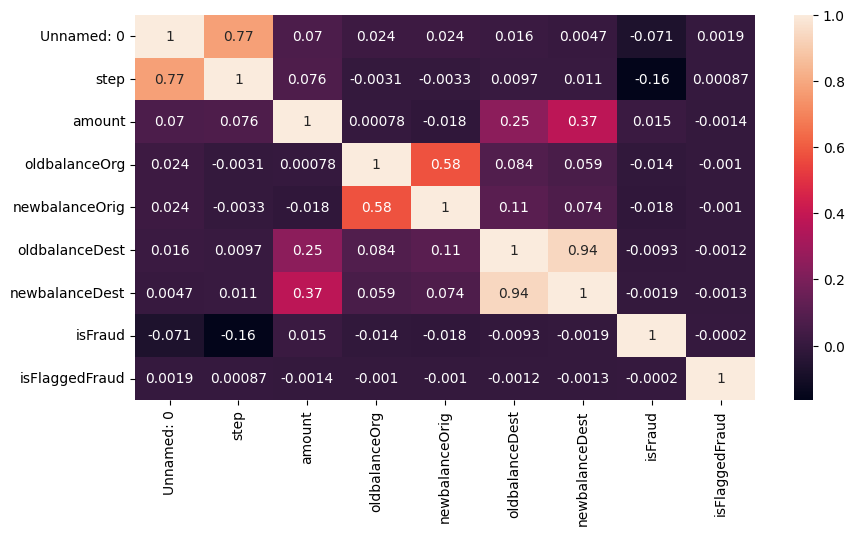

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(AML_Data.corr(),annot=True)

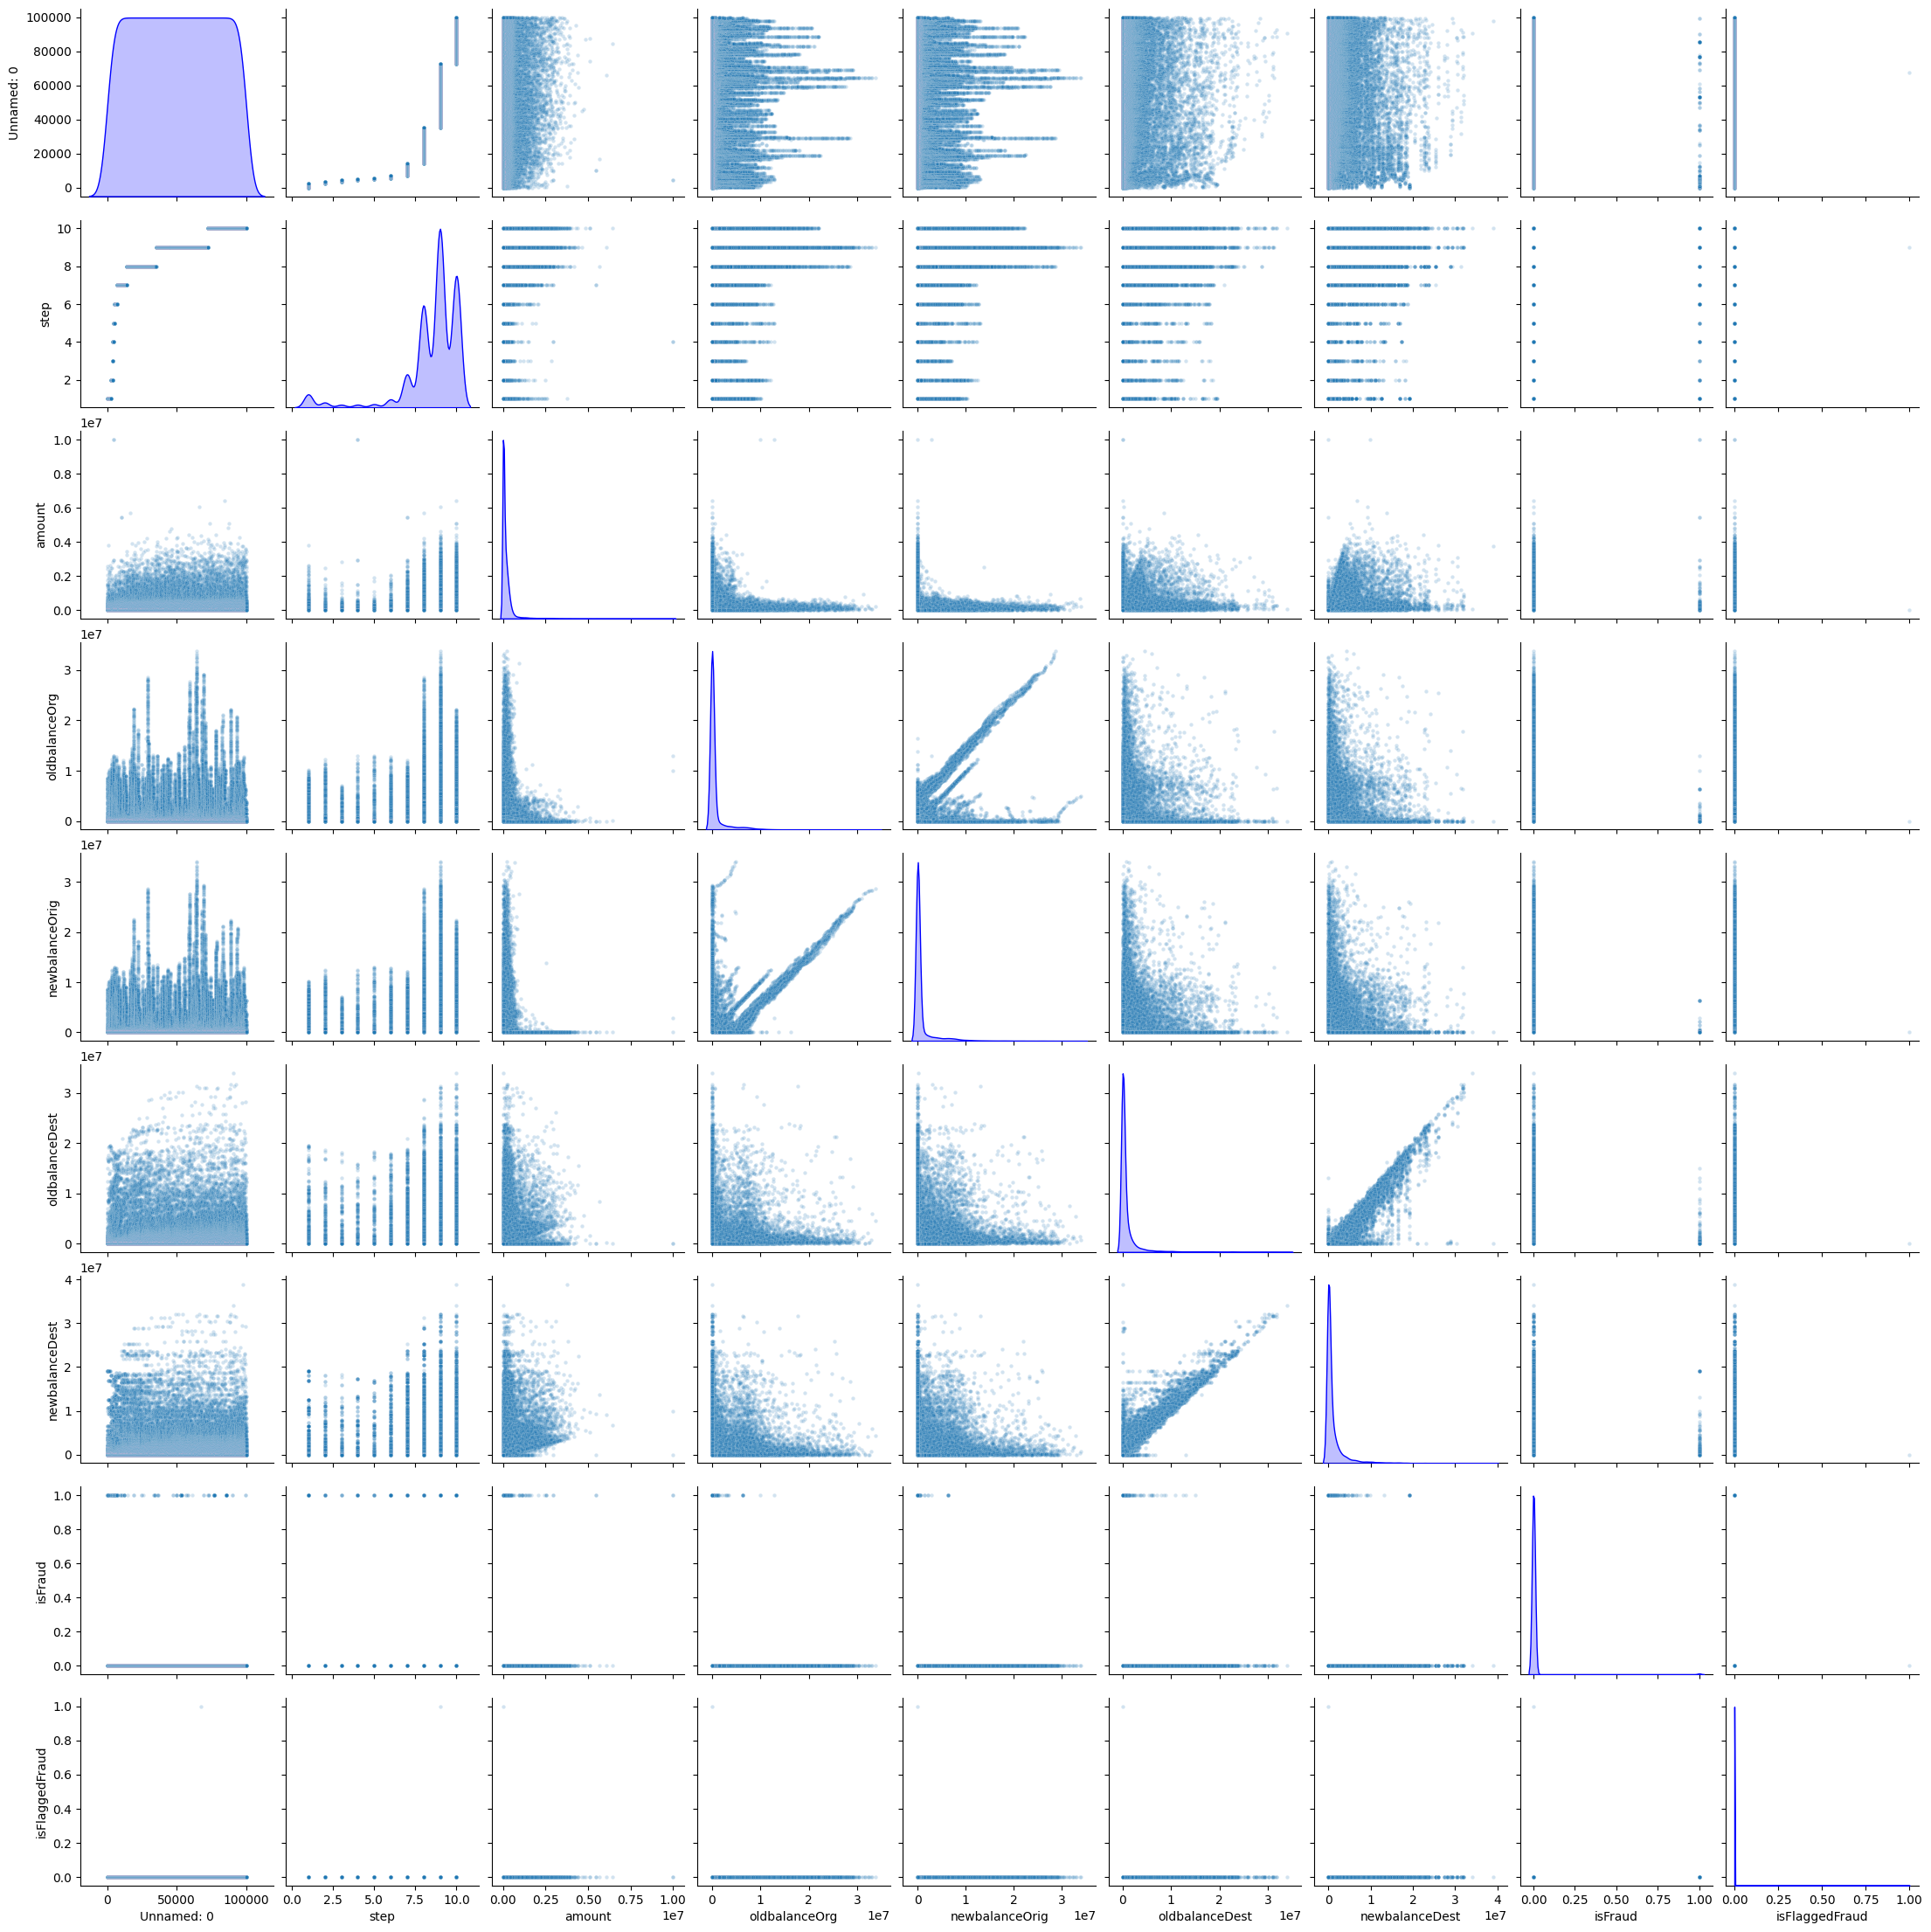

In [21]:
sns.pairplot(AML_Data, diag_kind='kde', 
             plot_kws={'alpha': 0.2, 's': 10}, 
             diag_kws={'bw_adjust': 1.5, 'color': 'blue'},
             palette='coolwarm')

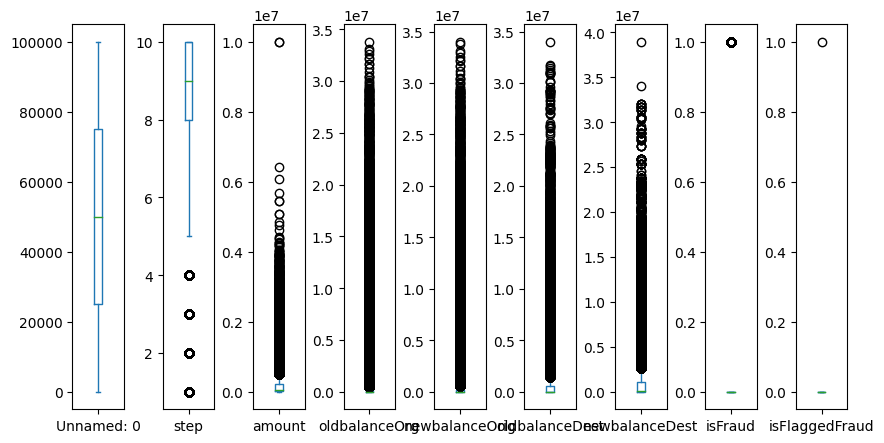

In [22]:
#to find wheather it has outlier using box plot
AML_Data.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 5))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

## Exploring Some AutoEDA

                                             |                                             | [  0%]   00:00 ->…


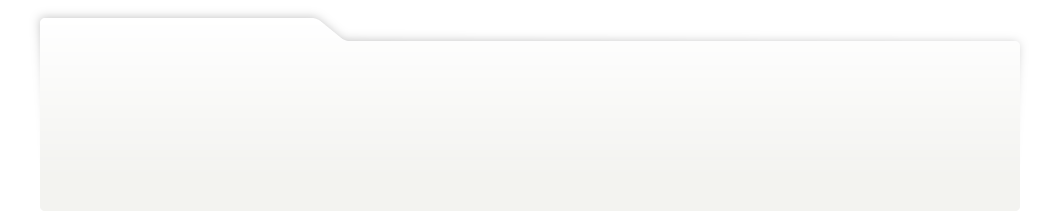
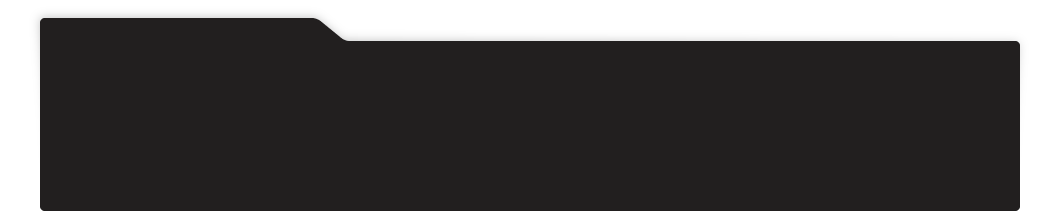
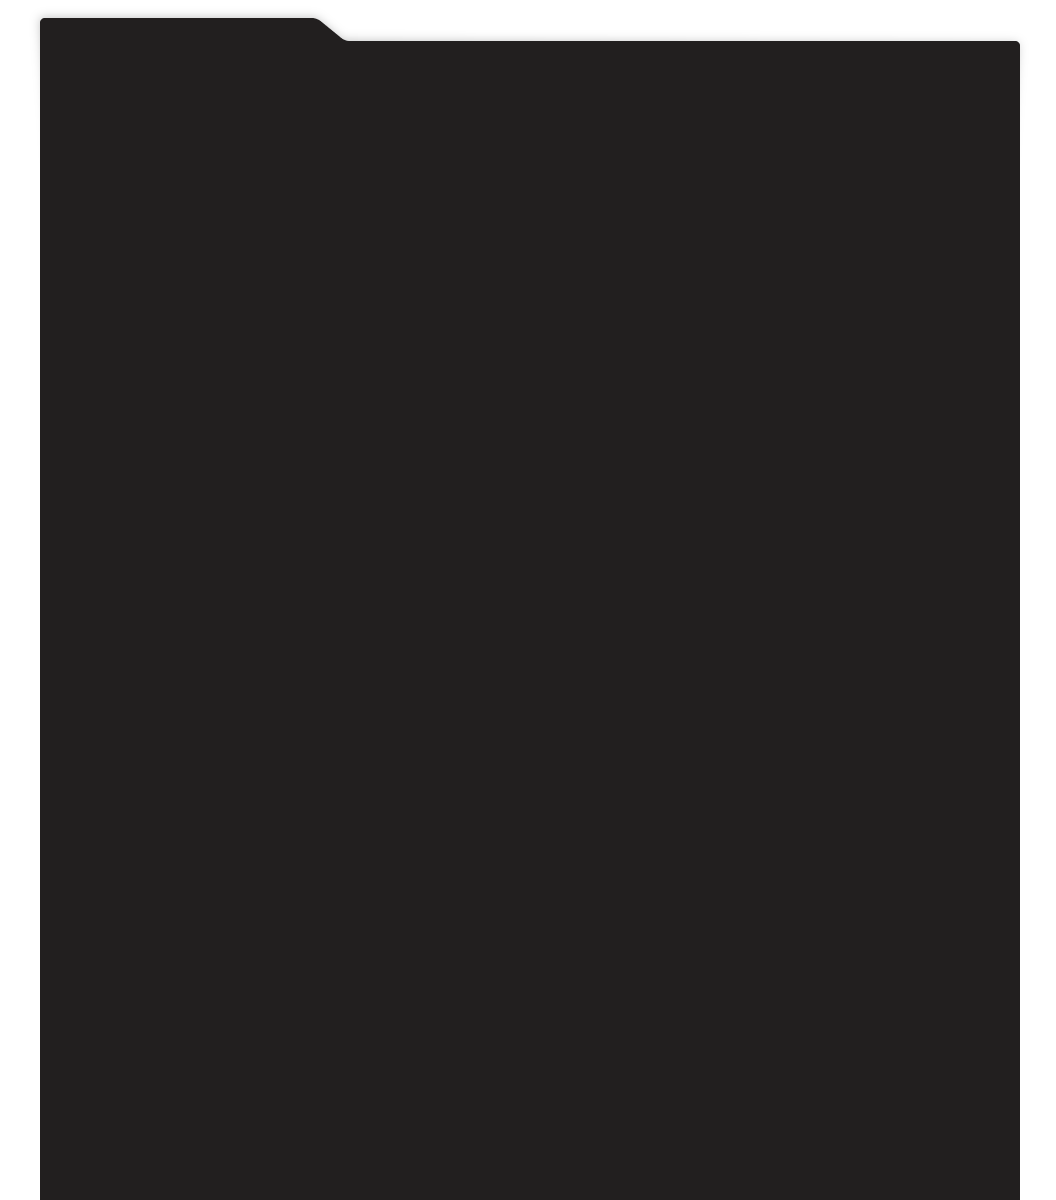
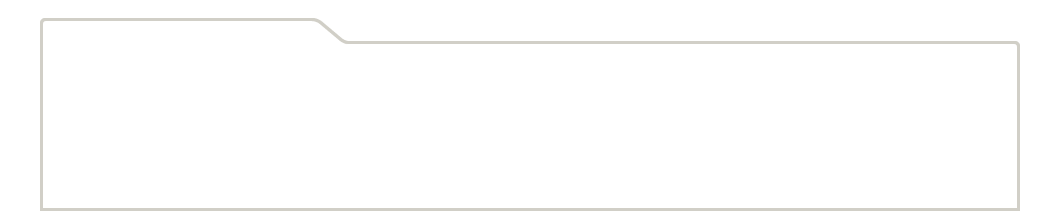
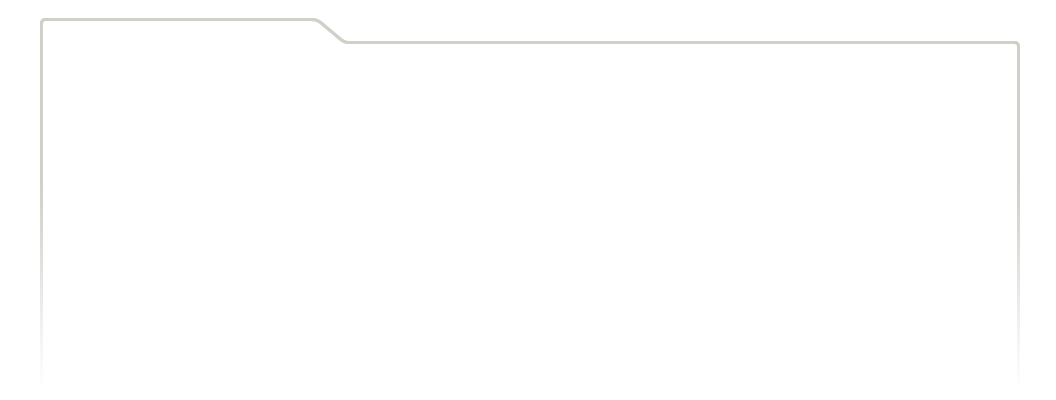
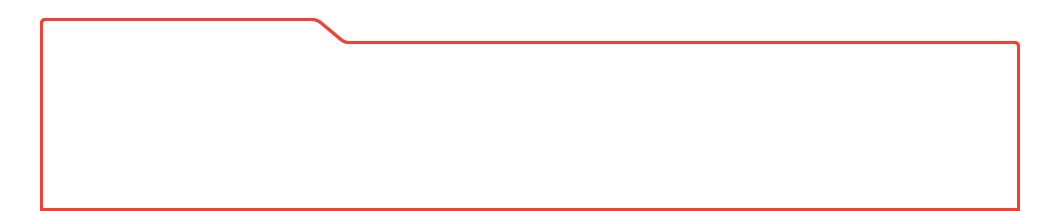
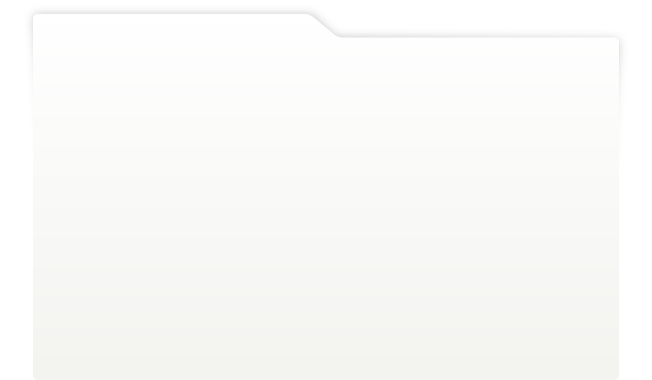
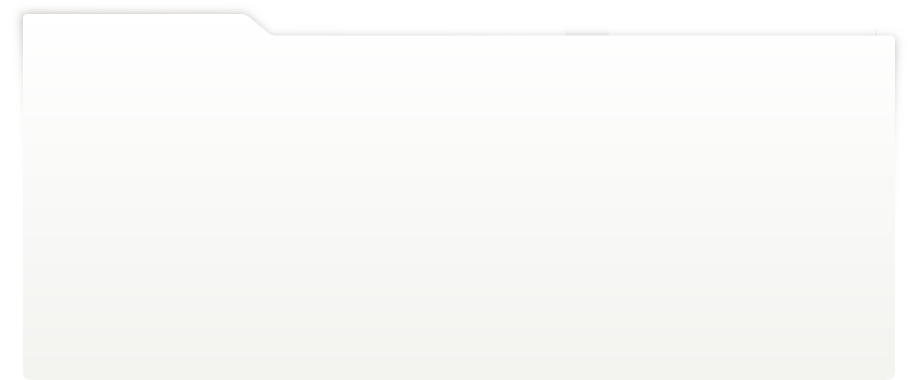
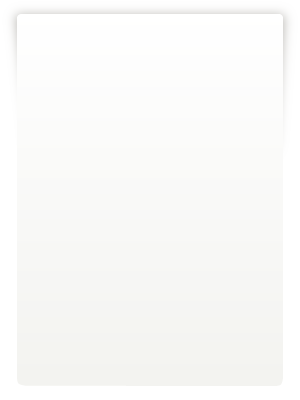
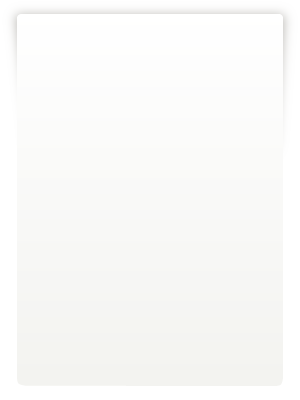
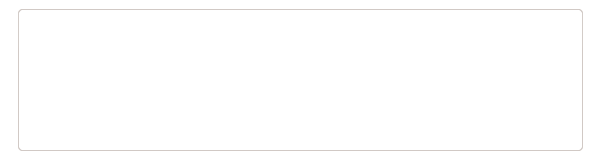
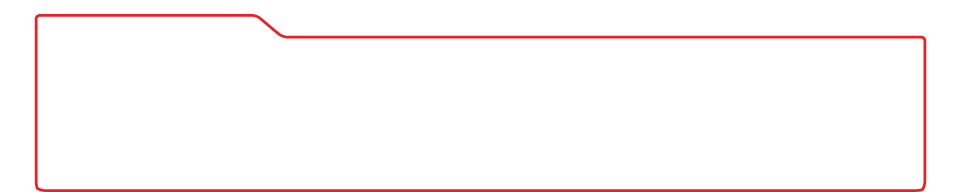
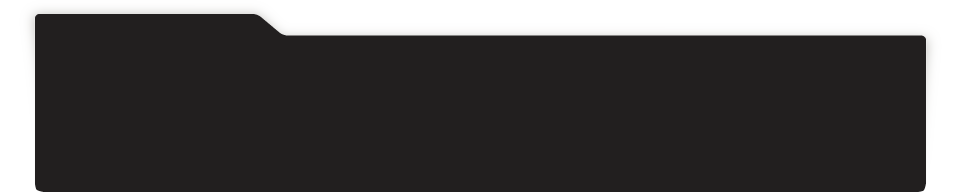
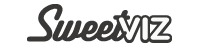
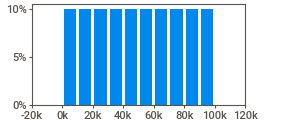
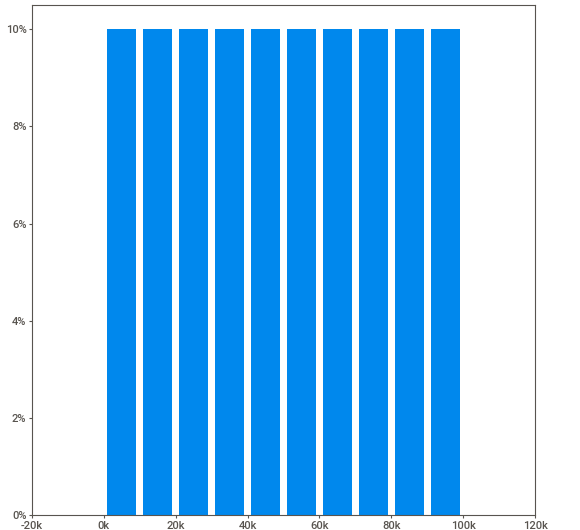
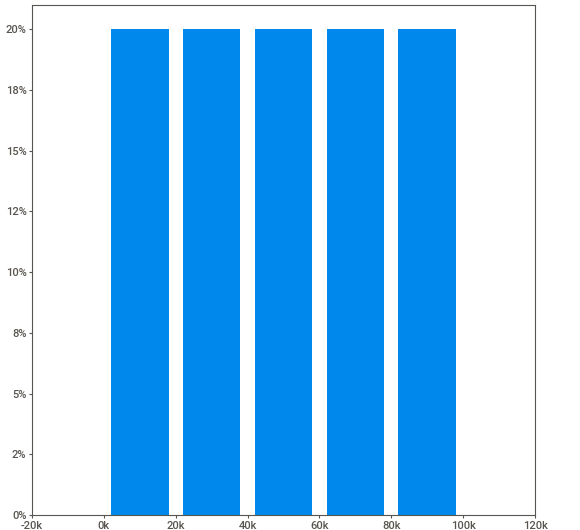
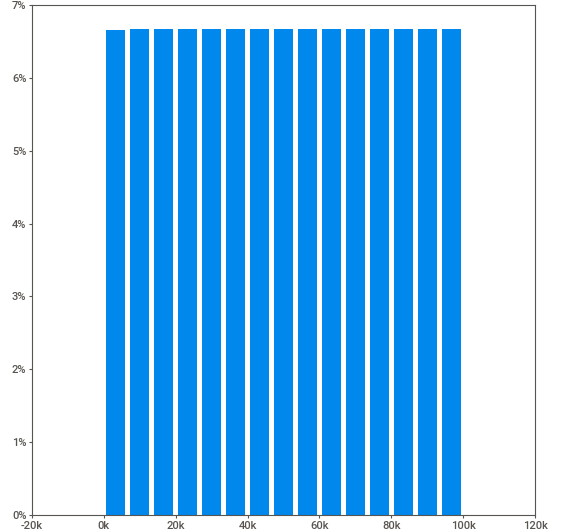
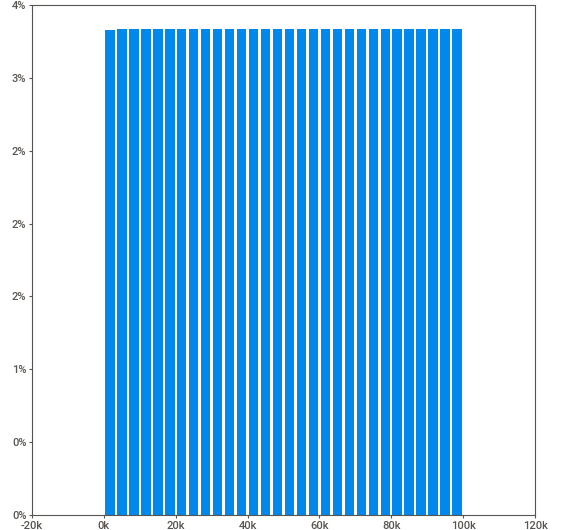
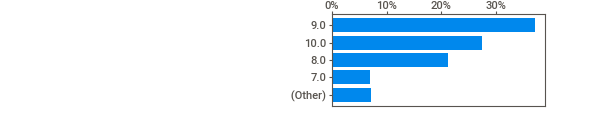
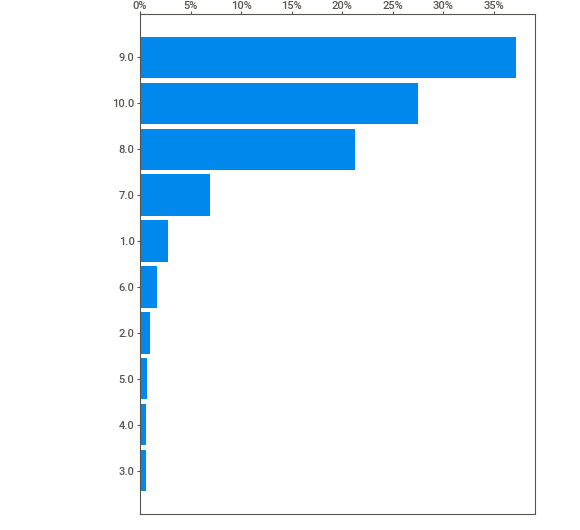
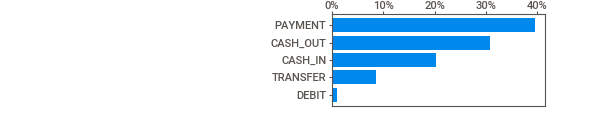
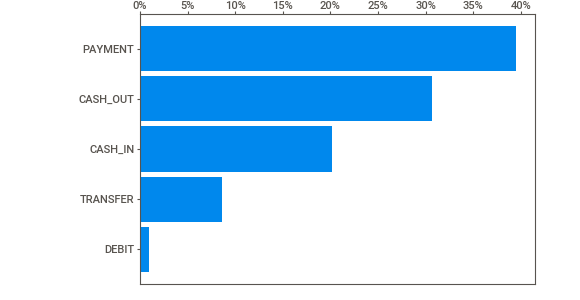
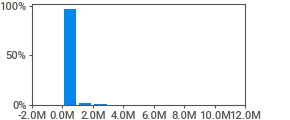
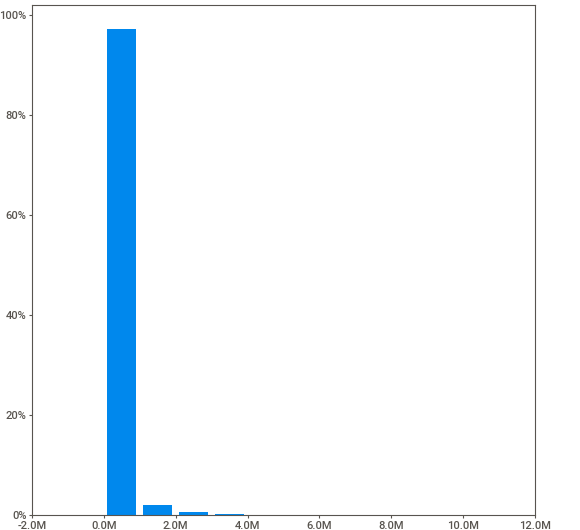
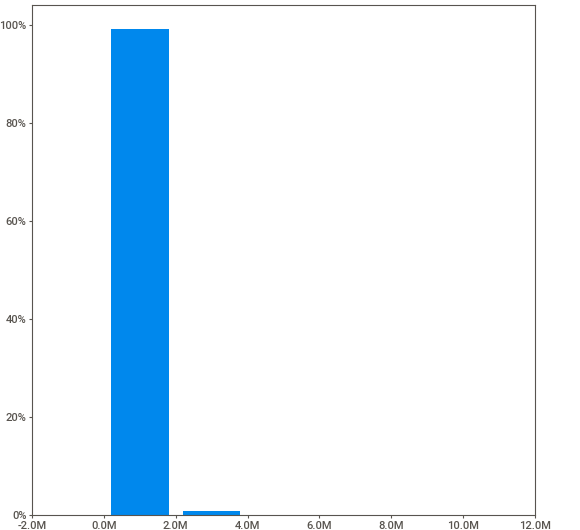
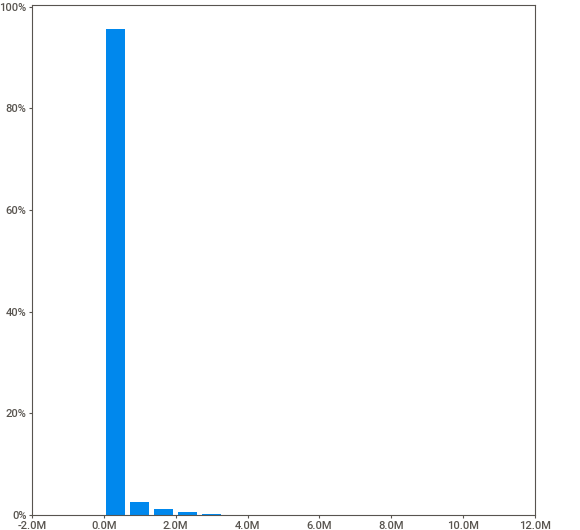
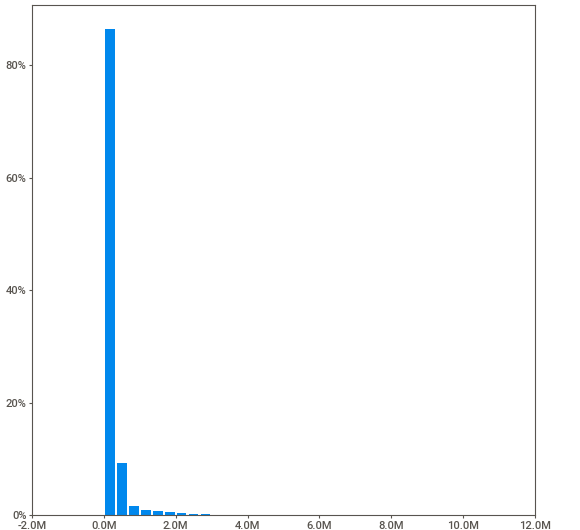
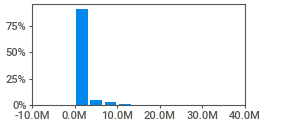
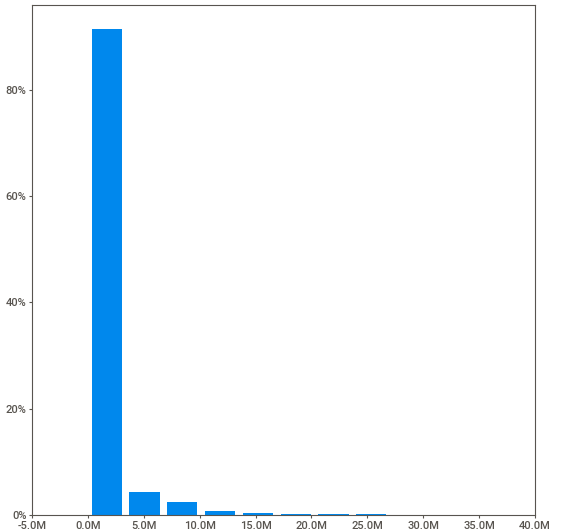
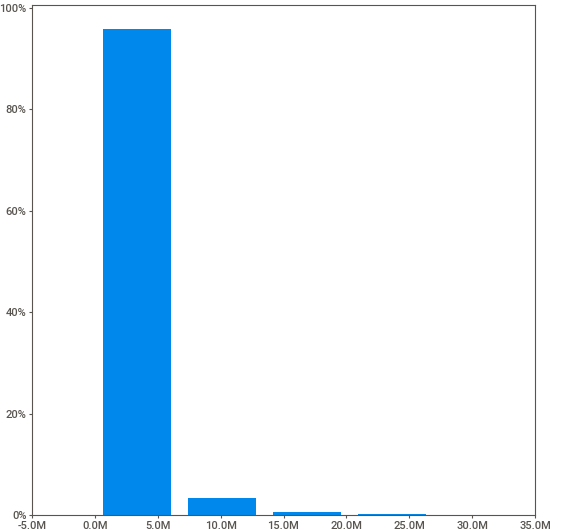
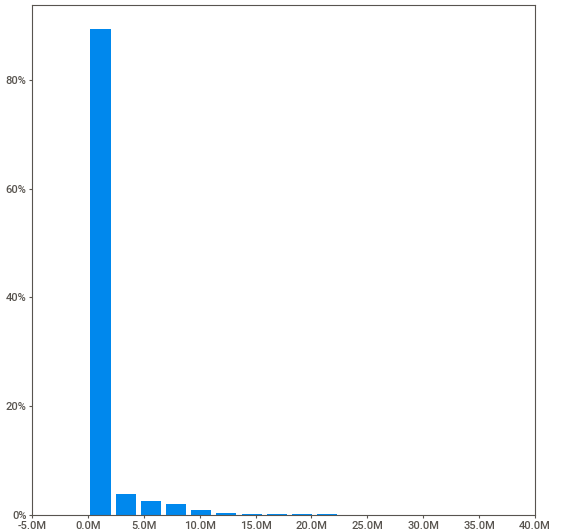
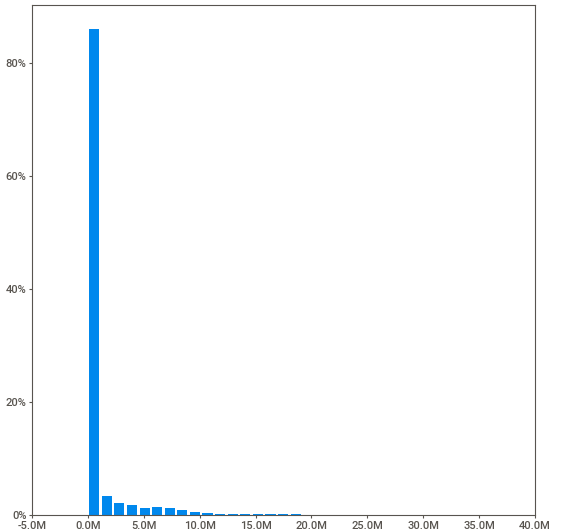
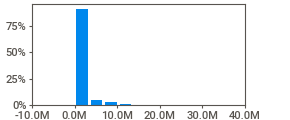
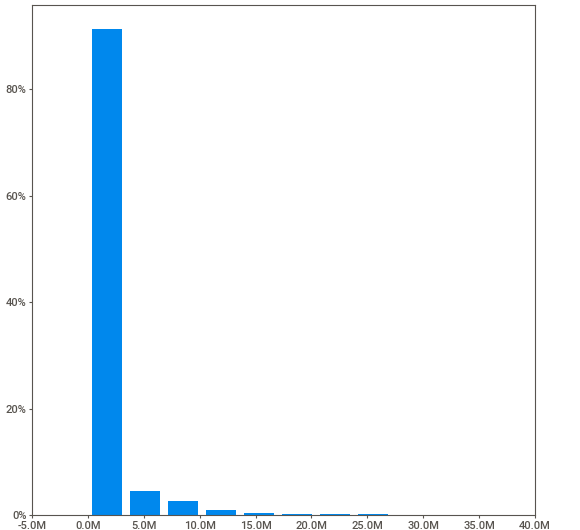
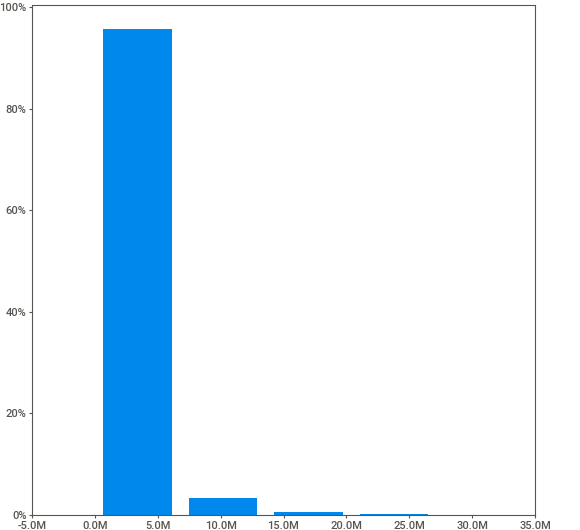
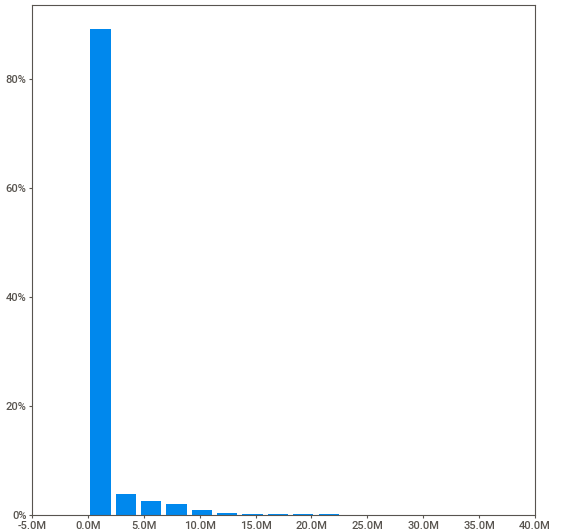
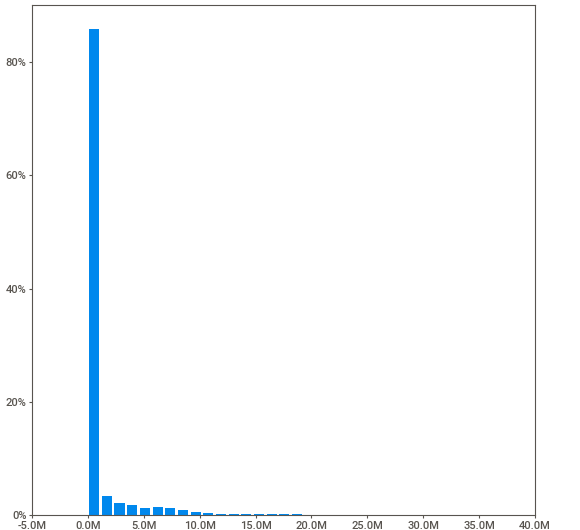
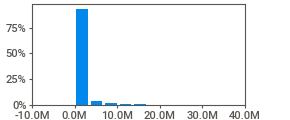
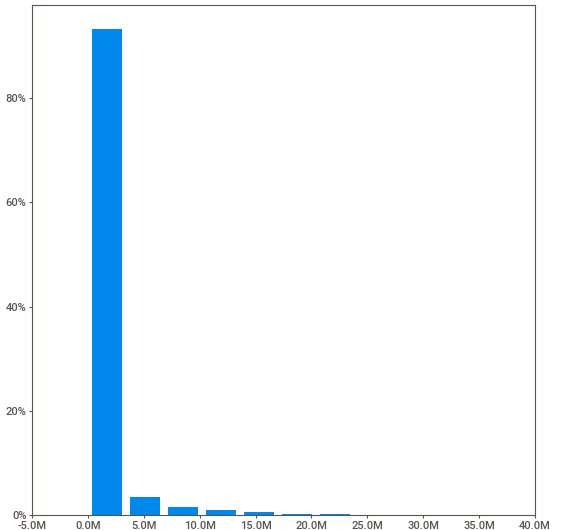
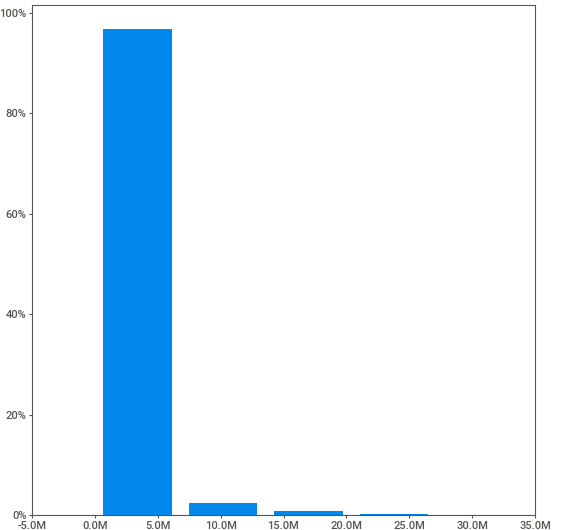
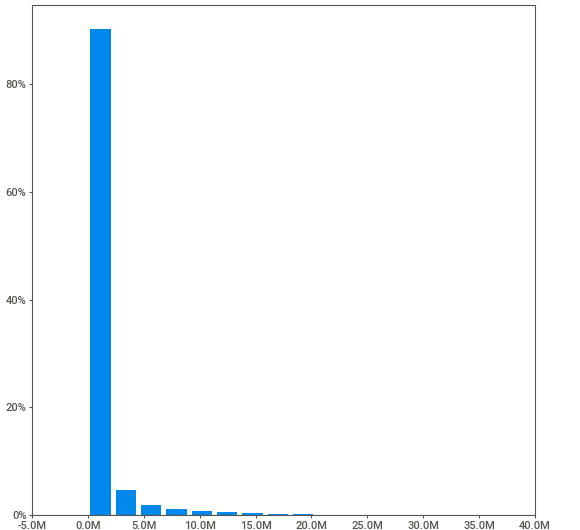
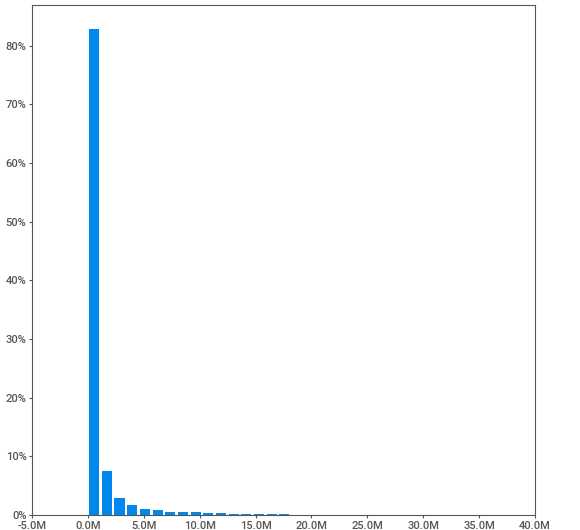
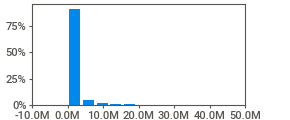
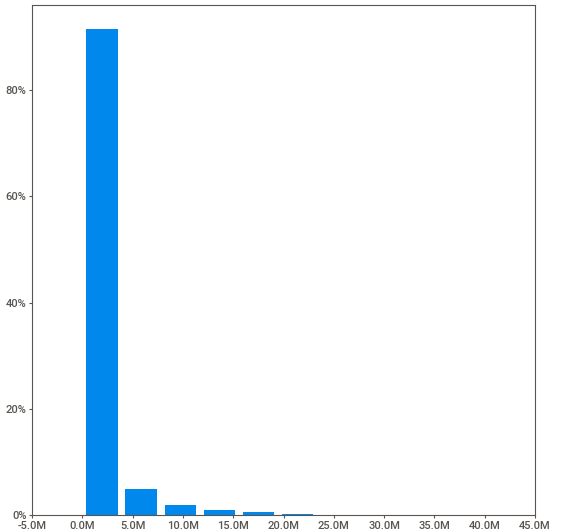
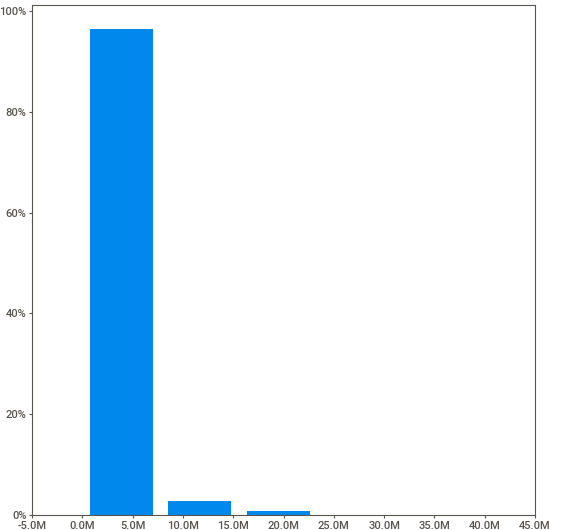
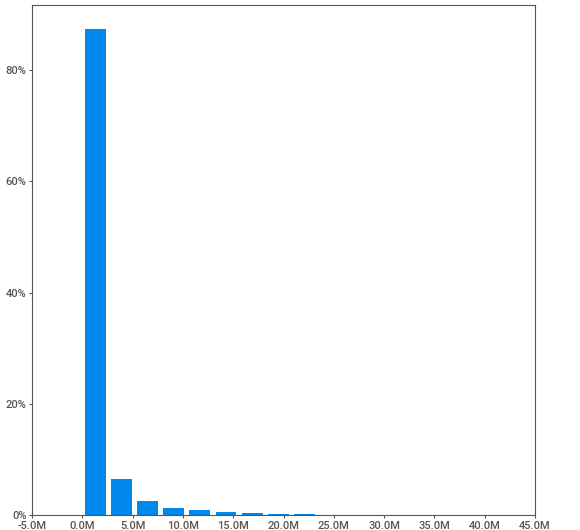
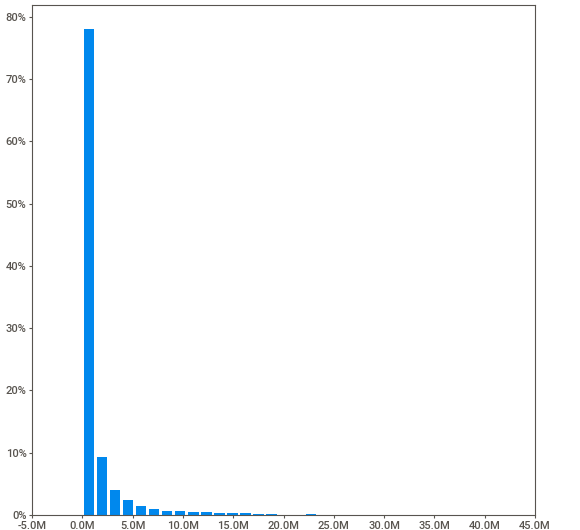
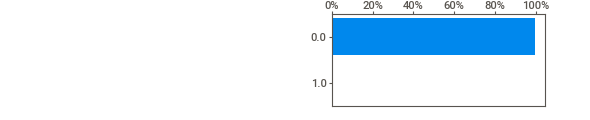
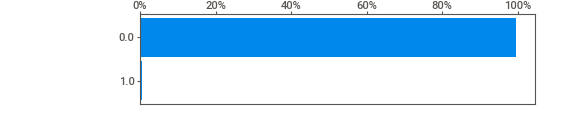
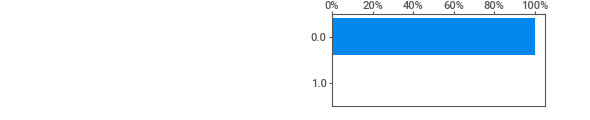
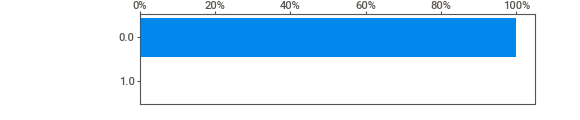
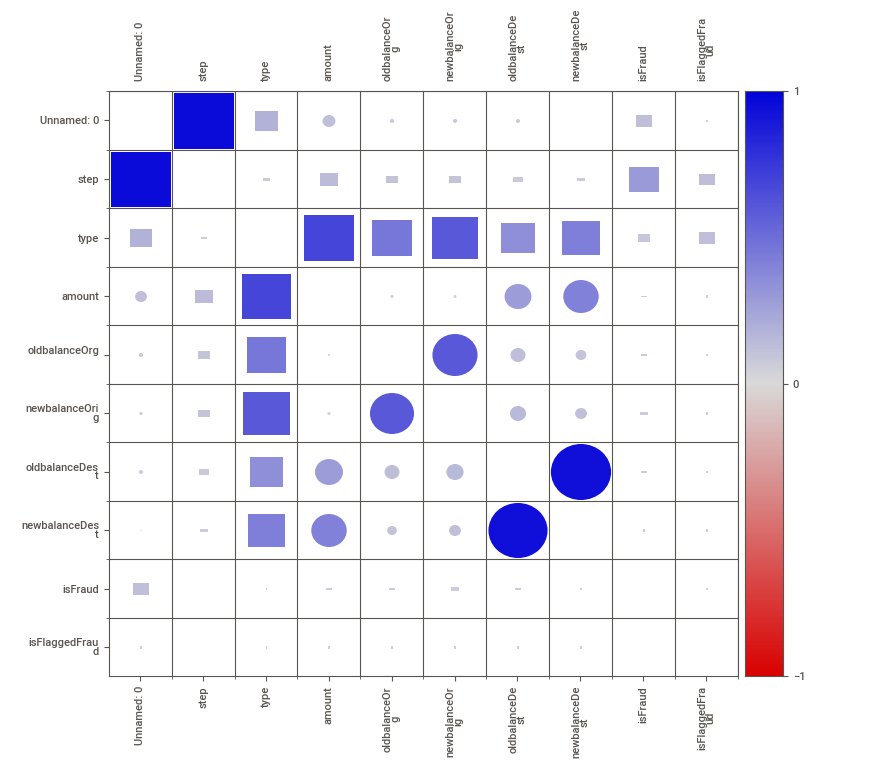
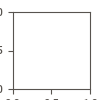

In [23]:
import sweetviz

my_report = sweetviz.analyze([AML_Data,'AML_Data'])
my_report.show_notebook()

## Preprocessing of Data

### Remove Unwanted Features

In [24]:
AML_Data.drop(['Unnamed: 0','step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
AML_Data = AML_Data.reset_index(drop=True)

### Seperating the Predictors and Target variables

In [25]:
AML_Data = AML_Data.dropna(subset=["isFraud"])

In [26]:
X = pd.DataFrame(AML_Data.iloc[:, 0:6])
Y = pd.DataFrame(AML_Data.iloc[:, 6])

In [27]:
X

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       PAYMENT   9839.64       170136.0       160296.36            0.00   
1       PAYMENT   1864.28        21249.0        19384.72            0.00   
2      TRANSFER    181.00          181.0            0.00            0.00   
3      CASH_OUT    181.00          181.0            0.00        21182.00   
4       PAYMENT  11668.14        41554.0        29885.86            0.00   
...         ...       ...            ...             ...             ...   
99982   PAYMENT   4883.01            NaN            0.00            0.00   
99983   PAYMENT   2125.26            NaN         4437.74            0.00   
99984  CASH_OUT  73658.67            NaN            0.00       847020.94   
99985   CASH_IN  81261.11            NaN       197838.11       334858.84   
99986   PAYMENT  22551.77            NaN       107627.23            0.00   

       newbalanceDest  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4                0.00  
...               ...  
99982            0.00  
99983            0.00  
99984       814955.79  
99985       309263.55  
99986            0.00  

[99683 rows x 6 columns]

In [28]:
Y

isFraud
0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
...        ...
99982      0.0
99983      0.0
99984      0.0
99985      0.0
99986      0.0

[99683 rows x 1 columns]

### Splitting the data into numerical and categorical

In [29]:
df_cate = X.select_dtypes(include=['object']).columns
df_num = X.select_dtypes(exclude=['object']).columns

In [30]:
for feature in AML_Data.columns:
    print("{} - has - {} - number of unique categories".format(feature, AML_Data[feature].nunique()))

type - has - 5 - number of unique categories
amount - has - 99155 - number of unique categories
oldbalanceOrg - has - 57936 - number of unique categories
newbalanceOrig - has - 48057 - number of unique categories
oldbalanceDest - has - 53393 - number of unique categories
newbalanceDest - has - 19123 - number of unique categories
isFraud - has - 2 - number of unique categories


In [31]:
print(df_cate)
print('\n')
print(df_num)

Index(['type'], dtype='object')


Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


## Missing value Analysis
### Imputation

In [32]:
#checking for missing values

AML_Data.isnull().sum()

type                0
amount              0
oldbalanceOrg     130
newbalanceOrig     22
oldbalanceDest     52
newbalanceDest      0
isFraud             0
dtype: int64

In [36]:
# Define pipeline for missing data if any

num_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='median'))])
preprocessor = ColumnTransformer(transformers=[('median',num_pipeline,df_num)])

# Fit the imputation pipeline to input features
imputation = preprocessor.fit(X)

#save the pipeline
joblib.dump(imputation,'medianimpute')

['medianimpute']

In [37]:
# Transformed data
cleandata = pd.DataFrame(imputation.transform(X), columns = df_num)
cleandata.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [38]:
AML_Data.fillna(AML_Data.median(),inplace=True)

## Outlier Analysis

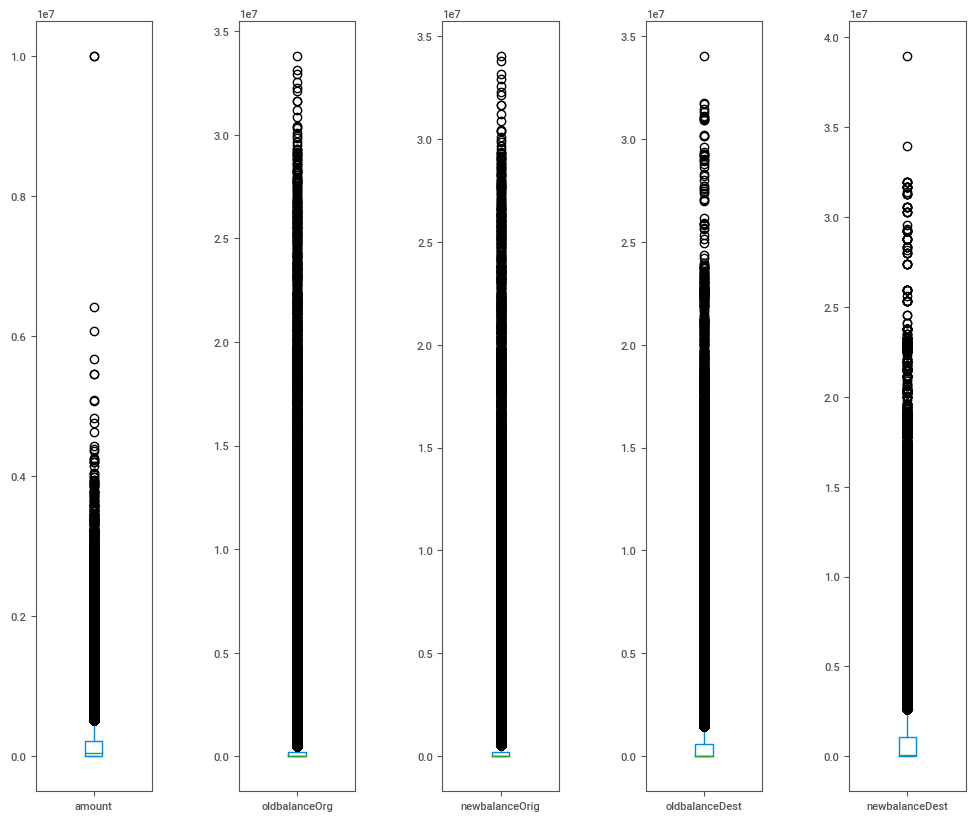

In [39]:
#to find wheather it has outlier using box plot
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 10))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [40]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr',
                          tail = 'both', fold = 1.5, variables = list(cleandata.columns))

clean = winsor.fit(cleandata)

# Save winsorizer model
joblib.dump(clean, 'winsor')

['winsor']

In [41]:
cleandata1 = clean.transform(cleandata)
cleandata1

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0       9839.64       170136.0       160296.36            0.00            0.00
1       1864.28        21249.0        19384.72            0.00            0.00
2        181.00          181.0            0.00            0.00            0.00
3        181.00          181.0            0.00        21182.00            0.00
4      11668.14        41554.0        29885.86            0.00            0.00
...         ...            ...             ...             ...             ...
99678   4883.01        20173.0            0.00            0.00            0.00
99679   2125.26        20173.0         4437.74            0.00            0.00
99680  73658.67        20173.0            0.00       847020.94       814955.79
99681  81261.11        20173.0       197838.11       334858.84       309263.55
99682  22551.77        20173.0       107627.23            0.00            0.00

[99683 rows x 5 columns]

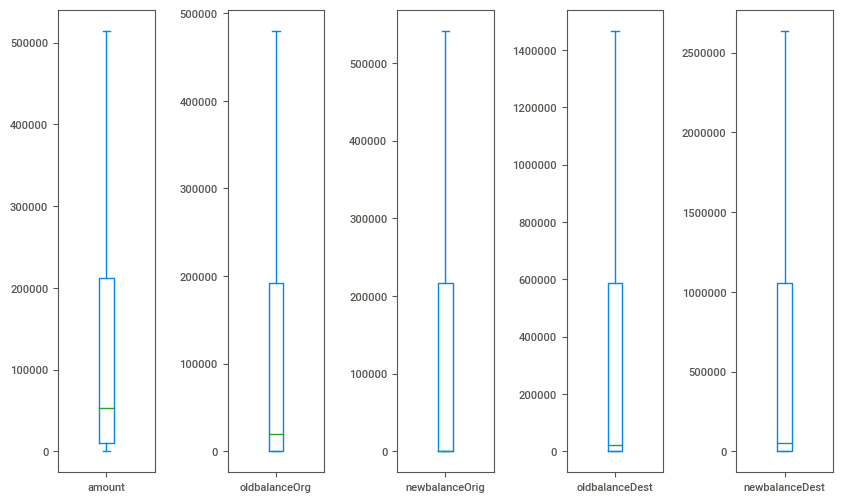

In [42]:
# Boxplot
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

## Scaling with MinMaxScaler

In [43]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, df_num)])
scale = scale_columntransfer.fit(cleandata1)

In [44]:
# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

['minmax']

In [45]:
scaled_data = pd.DataFrame(scale.transform(cleandata1))
scaled_data
scaled_data.describe()

0             1             2             3             4
count  99683.000000  99683.000000  99683.000000  99683.000000  99683.000000
mean       0.254795      0.263568      0.251573      0.252919      0.245379
std        0.305937      0.386628      0.388805      0.369740      0.358906
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.019354      0.000000      0.000000      0.000000      0.000000
50%        0.101934      0.042077      0.000000      0.014073      0.018624
75%        0.411612      0.400000      0.400000      0.400000      0.400000
max        1.000000      1.000000      1.000000      1.000000      1.000000

### Zero variance and near zero variance ####

In [46]:
scaled_data.var() == 0

0    False
1    False
2    False
3    False
4    False
dtype: bool

## Encoding Categorical features

In [47]:
encoding_pipeline = Pipeline(steps = [('lable', OneHotEncoder(drop = 'if_binary'))])
preprocess_pipeline1 = ColumnTransformer(transformers = [('categorical', encoding_pipeline, df_cate)])
clean1 = preprocess_pipeline1.fit(X)
joblib.dump(clean1, 'encode')

['encode']

In [48]:
encode_data = pd.DataFrame(clean1.transform(X).todense())
encode_data

0    1    2    3    4
0      0.0  0.0  0.0  1.0  0.0
1      0.0  0.0  0.0  1.0  0.0
2      0.0  0.0  0.0  0.0  1.0
3      0.0  1.0  0.0  0.0  0.0
4      0.0  0.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...
99678  0.0  0.0  0.0  1.0  0.0
99679  0.0  0.0  0.0  1.0  0.0
99680  0.0  1.0  0.0  0.0  0.0
99681  1.0  0.0  0.0  0.0  0.0
99682  0.0  0.0  0.0  1.0  0.0

[99683 rows x 5 columns]

In [49]:
clean_data = pd.concat([scaled_data, encode_data], axis=1 , ignore_index = True)
clean_data

0         1         2         3         4    5    6    7    8  \
0      0.019150  0.354870  0.296393  0.000000  0.000000  0.0  0.0  0.0  1.0   
1      0.003628  0.044321  0.035843  0.000000  0.000000  0.0  0.0  0.0  1.0   
2      0.000352  0.000378  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
3      0.000352  0.000378  0.000000  0.014460  0.000000  0.0  1.0  0.0  0.0   
4      0.022708  0.086673  0.055260  0.000000  0.000000  0.0  0.0  0.0  1.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
99678  0.009503  0.042077  0.000000  0.000000  0.000000  0.0  0.0  0.0  1.0   
99679  0.004136  0.042077  0.008206  0.000000  0.000000  0.0  0.0  0.0  1.0   
99680  0.143358  0.042077  0.000000  0.578205  0.309379  0.0  1.0  0.0  0.0   
99681  0.158154  0.042077  0.365809  0.228586  0.117405  1.0  0.0  0.0  0.0   
99682  0.043891  0.042077  0.199006  0.000000  0.000000  0.0  0.0  0.0  1.0   

         9  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      0.0  
...    ...  
99678  0.0  
99679  0.0  
99680  0.0  
99681  0.0  
99682  0.0  

[99683 rows x 10 columns]

### SMOTE

In [50]:
X

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       PAYMENT   9839.64       170136.0       160296.36            0.00   
1       PAYMENT   1864.28        21249.0        19384.72            0.00   
2      TRANSFER    181.00          181.0            0.00            0.00   
3      CASH_OUT    181.00          181.0            0.00        21182.00   
4       PAYMENT  11668.14        41554.0        29885.86            0.00   
...         ...       ...            ...             ...             ...   
99982   PAYMENT   4883.01            NaN            0.00            0.00   
99983   PAYMENT   2125.26            NaN         4437.74            0.00   
99984  CASH_OUT  73658.67            NaN            0.00       847020.94   
99985   CASH_IN  81261.11            NaN       197838.11       334858.84   
99986   PAYMENT  22551.77            NaN       107627.23            0.00   

       newbalanceDest  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4                0.00  
...               ...  
99982            0.00  
99983            0.00  
99984       814955.79  
99985       309263.55  
99986            0.00  

[99683 rows x 6 columns]

In [51]:
X['type'].nunique()

5

In [52]:
clean_data

0         1         2         3         4    5    6    7    8  \
0      0.019150  0.354870  0.296393  0.000000  0.000000  0.0  0.0  0.0  1.0   
1      0.003628  0.044321  0.035843  0.000000  0.000000  0.0  0.0  0.0  1.0   
2      0.000352  0.000378  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
3      0.000352  0.000378  0.000000  0.014460  0.000000  0.0  1.0  0.0  0.0   
4      0.022708  0.086673  0.055260  0.000000  0.000000  0.0  0.0  0.0  1.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
99678  0.009503  0.042077  0.000000  0.000000  0.000000  0.0  0.0  0.0  1.0   
99679  0.004136  0.042077  0.008206  0.000000  0.000000  0.0  0.0  0.0  1.0   
99680  0.143358  0.042077  0.000000  0.578205  0.309379  0.0  1.0  0.0  0.0   
99681  0.158154  0.042077  0.365809  0.228586  0.117405  1.0  0.0  0.0  0.0   
99682  0.043891  0.042077  0.199006  0.000000  0.000000  0.0  0.0  0.0  1.0   

         9  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      0.0  
...    ...  
99678  0.0  
99679  0.0  
99680  0.0  
99681  0.0  
99682  0.0  

[99683 rows x 10 columns]

In [53]:
X = clean_data

In [54]:
X

0         1         2         3         4    5    6    7    8  \
0      0.019150  0.354870  0.296393  0.000000  0.000000  0.0  0.0  0.0  1.0   
1      0.003628  0.044321  0.035843  0.000000  0.000000  0.0  0.0  0.0  1.0   
2      0.000352  0.000378  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
3      0.000352  0.000378  0.000000  0.014460  0.000000  0.0  1.0  0.0  0.0   
4      0.022708  0.086673  0.055260  0.000000  0.000000  0.0  0.0  0.0  1.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
99678  0.009503  0.042077  0.000000  0.000000  0.000000  0.0  0.0  0.0  1.0   
99679  0.004136  0.042077  0.008206  0.000000  0.000000  0.0  0.0  0.0  1.0   
99680  0.143358  0.042077  0.000000  0.578205  0.309379  0.0  1.0  0.0  0.0   
99681  0.158154  0.042077  0.365809  0.228586  0.117405  1.0  0.0  0.0  0.0   
99682  0.043891  0.042077  0.199006  0.000000  0.000000  0.0  0.0  0.0  1.0   

         9  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      0.0  
...    ...  
99678  0.0  
99679  0.0  
99680  0.0  
99681  0.0  
99682  0.0  

[99683 rows x 10 columns]

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
Y

isFraud
0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
...        ...
99982      0.0
99983      0.0
99984      0.0
99985      0.0
99986      0.0

[99683 rows x 1 columns]

In [57]:
over_sample = SMOTE()
feat,label = over_sample.fit_resample(X,Y)

<AxesSubplot: xlabel='isFraud', ylabel='count'>

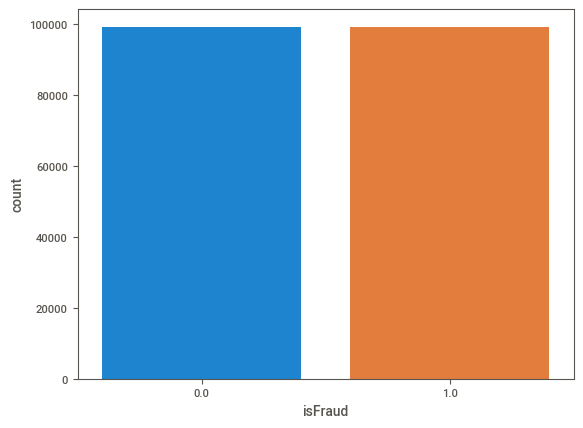

In [58]:
sns.countplot(data=label,x="isFraud")

In [59]:
feat

0         1         2         3         4    5    6    7    8  \
0       0.019150  0.354870  0.296393  0.000000  0.000000  0.0  0.0  0.0  1.0   
1       0.003628  0.044321  0.035843  0.000000  0.000000  0.0  0.0  0.0  1.0   
2       0.000352  0.000378  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
3       0.000352  0.000378  0.000000  0.014460  0.000000  0.0  1.0  0.0  0.0   
4       0.022708  0.086673  0.055260  0.000000  0.000000  0.0  0.0  0.0  1.0   
...          ...       ...       ...       ...       ...  ...  ...  ...  ...   
198531  0.004323  0.001078  0.000000  0.000000  0.000000  0.0  0.0  0.0  1.0   
198532  0.051210  0.030660  0.000000  0.294484  0.352683  0.0  1.0  0.0  0.0   
198533  0.006601  0.023823  0.014846  0.000000  0.000000  0.0  0.0  0.0  1.0   
198534  1.000000  0.127906  0.000000  0.003338  0.387433  0.0  0.0  0.0  0.0   
198535  0.012734  0.841997  0.323192  0.000000  0.000000  0.0  0.0  0.0  1.0   

          9  
0       0.0  
1       0.0  
2       1.0  
3       0.0  
4       0.0  
...     ...  
198531  0.0  
198532  0.0  
198533  0.0  
198534  1.0  
198535  0.0  

[198536 rows x 10 columns]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 42)

In [61]:
X_train.shape, y_train.shape

((138975, 10), (138975, 1))

In [62]:
X_test.shape, y_test.shape

((59561, 10), (59561, 1))

### Correlation

<AxesSubplot: >

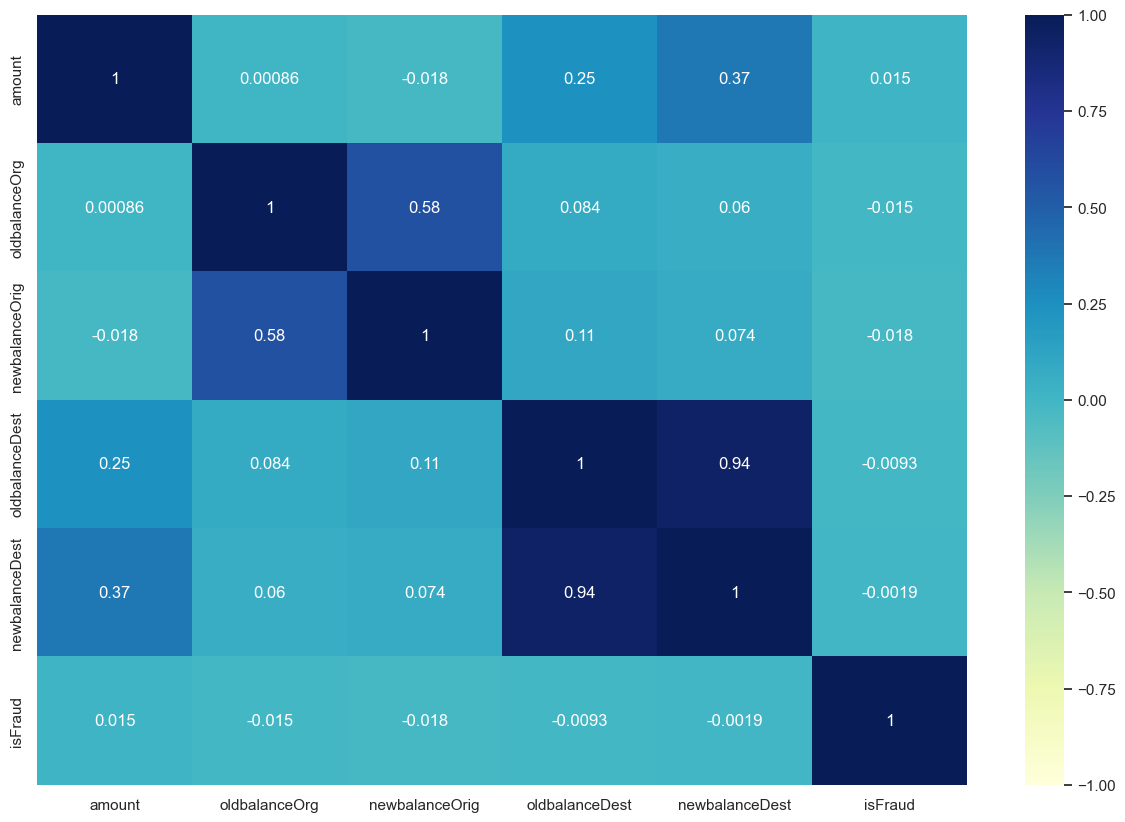

In [63]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(AML_Data.corr(), annot = True, cmap = "YlGnBu", vmin=-1, vmax=1)

In [64]:
corr=round(AML_Data[[feature for feature in AML_Data.columns]].corr(),2)
corr

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount            1.00           0.00           -0.02            0.25   
oldbalanceOrg     0.00           1.00            0.58            0.08   
newbalanceOrig   -0.02           0.58            1.00            0.11   
oldbalanceDest    0.25           0.08            0.11            1.00   
newbalanceDest    0.37           0.06            0.07            0.94   
isFraud           0.01          -0.01           -0.02           -0.01   

                newbalanceDest  isFraud  
amount                    0.37     0.01  
oldbalanceOrg             0.06    -0.01  
newbalanceOrig            0.07    -0.02  
oldbalanceDest            0.94    -0.01  
newbalanceDest            1.00    -0.00  
isFraud                  -0.00     1.00

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

In [2]:
# Define a list of classifiers to test
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SVC()
]

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f" {clf.__class__.__name__} evaluation: ".center(100,"#"))
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print()

################################# KNeighborsClassifier evaluation: #################################
Accuracy: 0.929
Confusion Matrix:
[[26347  3267]
 [  936 29011]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     29614
         1.0       0.90      0.97      0.93     29947

    accuracy                           0.93     59561
   macro avg       0.93      0.93      0.93     59561
weighted avg       0.93      0.93      0.93     59561


################################ DecisionTreeClassifier evaluation: ################################
Accuracy: 0.939
Confusion Matrix:
[[27446  2168]
 [ 1468 28479]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     29614
         1.0       0.93      0.95      0.94     29947

    accuracy                           0.94     59561
   macro avg       0.94      0.94      0.94     59561
weighted avg       0.9

In [ ]:
import pickle
import os
file_path = 'model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(AML_Data, f)

In [ ]:

[tp TN
Nt NN]
